<a href="https://colab.research.google.com/github/junyi2022/musa-650-remote-sensing/blob/main/assignments/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MUSA 650 Homework 1: Basics of Machine Learning

In this assignment, you’ll explore fundamental machine learning concepts and techniques, with a focus on data preprocessing, image manipulation, and model evaluation.

**Disclaimer:** I consulted the following AI tool to revise codes and answer questions for this project.

- DeepSeek. (n.d.). DeepSeek artificial intelligence system. Retrieved from https://www.deepseek.com

# 1. Data Exploration

Load the mnist dataset using the following code. The mnist dataset is a collection of 28x28 grayscale images of handwritten digits (0-9). Each image is represented as a 2D array (28 rows and 28 columns), and each pixel is a feature. The y data contains labels for the x data.

In [1]:
import pandas as pandas
import numpy as np
import matplotlib.pyplot as plt
import keras

from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


## 1.1 Dimensionality

### 1.1.1 Data Type
The type of the training and testing dataset are numpy n-dimensional array.

In [ ]:
type(x_train)
type(x_test)

numpy.ndarray

### 1.1.2 Number of features and samples
The shape of `x_train` and `x_test` is (num_samples, height, width). Therefore, there are 60000 samples in the training dataset and 10000 samples in the testing dataset. Each sample is an image of 28 x 28 = 784 features.

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

### 1.1.3 Explore `.shape`
If an array has a shape of (100, 28, 28), 100 means the number of images and 28 represent the number of pixels. When flattening the 3D array (100, 28, 28) into a 2D array, I convert each 28x28 image into a 1D array of 784 pixels. The resulting shape will be (100, 784).

### 1.1.4 How to convert from 3D array to 2D array
`flaten()` and `reshape()` can be used to convert a 3D array into a 2D array without changing the total number of elements. Both methods achieve the same goal but differ in how they handle memory and the resulting array.

The `reshape()` function does not create a copy of the data unless necessary, making it memory-efficient.

In [ ]:
x_train_2d = x_train.reshape(x_train.shape[0], -1) # -1 automatically calculates the size of the second dimension based on the total number of elements.
x_train_2d.shape

(60000, 784)

The `flatten()` method always returns a copy of the data as a 1D array and is less memory-efficient.

In [ ]:
flattened_x_train = x_train.flatten()
x_train_2d = flattened_x_train.reshape(x_train.shape[0], -1)

In [ ]:
print("Original 3D array shape:", x_train.shape)
print("Flattened 1D array shape:", flattened_x_train.shape)
print("Reshaped 2D array shape:", x_train_2d.shape)

Original 3D array shape: (60000, 28, 28)
Flattened 1D array shape: (47040000,)
Reshaped 2D array shape: (60000, 784)


Use `reshape()` when you want to change the shape of an array without copying data.

Use `flatten()` when you need a 1D copy of the array, or when you want to ensure the data is contiguous in memory.

For converting a 3D array to a 2D array, `reshape()` is generally preferred due to its memory efficiency.

### 1.1.5 Why reshape when transitioning from raw images to model input
1. Model Input Requirements:

- Most neural networks (e.g., fully connected layers in a Multilayer Perceptron) expect input data in a specific format, typically a 2D array where:

  - Each row represents a sample (e.g., an image).

  - Each column represents a feature (e.g., a pixel value).

- Raw image data is often stored as a 3D array (e.g., (num_samples, height, width) for grayscale images or (num_samples, height, width, channels) for RGB images). Reshaping converts this into the required 2D format.

2. Flattening for Fully Connected Layers:

- Fully connected (dense) layers in neural networks require input data to be in the form of vectors (1D arrays). Each neuron in the layer connects to every input feature, so the input must be flattened into a 1D array.

3. Consistency in Data Representation:

- Reshaping ensures that all images have the same input format, which is necessary for batch processing and efficient computation.

4. Memory and Computational Efficiency:

- Reshaping allows the data to be stored in a contiguous block of memory, which improves computational efficiency and makes it easier to perform vectorized operations.

### 1.1.6 Implications of reshaping an image array into a vector (1D array) for each sample

1. Loss of Spatial Structure:
- When an image is flattened into a 1D array, the spatial relationships between pixels (e.g., neighboring pixels) are lost.

- This can be a disadvantage for tasks where spatial information is important (e.g., object detection, image segmentation).

2. Increased Dimensionality:
- Flattening increases the dimensionality of the input data. For example, a 28x28 grayscale image becomes a vector of length 784. This can lead to:

  - High computational cost: More parameters are required in fully connected layers, increasing the complexity of the model.

  - Risk of overfitting: With more features, the model may overfit the training data if not regularized properly.

3. Compatibility with Fully Connected Layers:
- Flattening is necessary to make the data compatible with fully connected layers, where each input feature (pixel) is connected to every neuron in the layer.

4. Impact on Model Architecture:
- Flattening is typically done before passing data to fully connected layers. However, for convolutional neural networks (CNNs), flattening is usually done after convolutional and pooling layers to preserve spatial information during feature extraction.

## 1.2 Visualization

Select one random example from each category in the testing set, display each 2D image, and label it with the corresponding category name.

In [ ]:
categories = np.unique(y_test)
categories

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

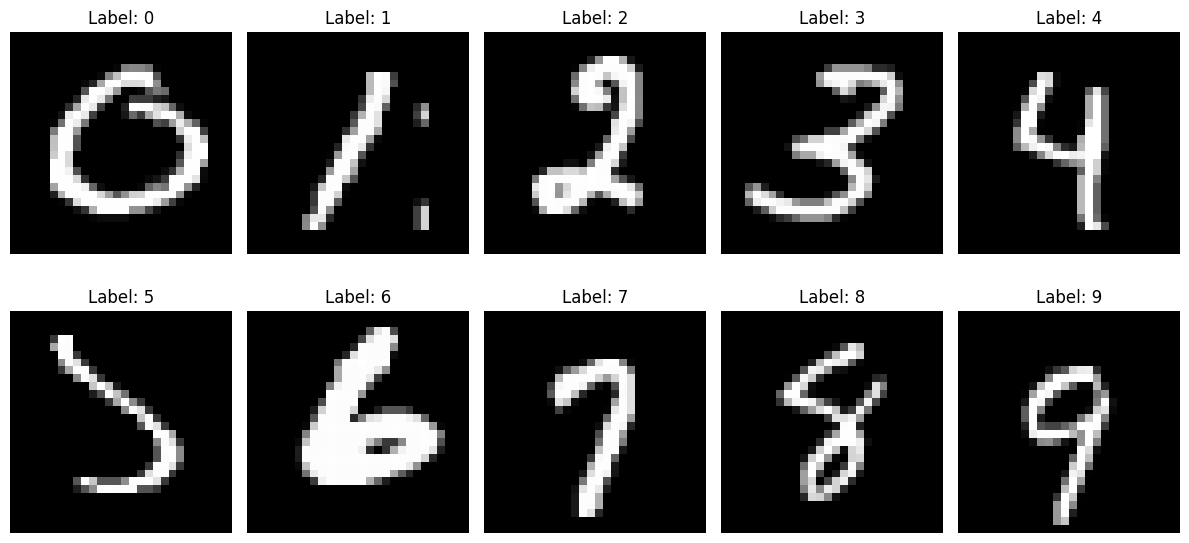

In [ ]:
plt.figure(figsize=(12, 6))

# Loop through each category and select one random example
for i, category in enumerate(categories):
    # Find indices of all samples in the current category
    indices = np.where(y_test == category)[0]

    # Randomly select one index from the current category
    random_index = np.random.choice(indices)

    # Extract the image and label
    image = x_test[random_index]
    label = y_test[random_index]

    # Plot the image
    plt.subplot(2, 5, i + 1)  # 2 rows, 5 columns
    plt.imshow(image, cmap='gray')
    plt.title(f"Label: {label}")
    plt.axis('off')

# Display the figure
plt.tight_layout()
plt.show()


# 2. Data Processing

## 2.1 Subsetting

### 2.1.1 10% random subset of each training and testing set
Create a 10% random subset of each training and testing set. The distribution of each label in the initial train data and the reduced train data are shown in the plots and texts. In both cases, the distribution of the reduced train data is very similar to the distribution of the initial train data.

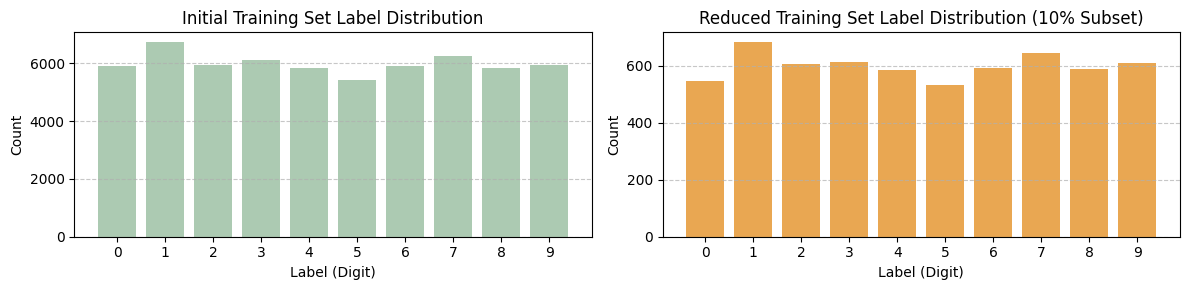

In [ ]:
# create a random subset of the data
def create_random_subset(x, y, subset_fraction):
    num_samples = len(x)
    subset_size = int(num_samples * subset_fraction)
    random_indices = np.random.choice(num_samples, subset_size, replace=False)
    return x[random_indices], y[random_indices]

x_train_subset, y_train_subset = create_random_subset(x_train, y_train, 0.1)
x_test_subset, y_test_subset = create_random_subset(x_test, y_test, 0.1)

# calculate the distribution of each label
def calculate_label_distribution(y):
    unique_labels, counts = np.unique(y, return_counts=True)
    return dict(zip(unique_labels, counts))

initial_train_distribution = calculate_label_distribution(y_train)
reduced_train_distribution = calculate_label_distribution(y_train_subset)

# plot distribution
plt.figure(figsize=(12, 3))

# Initial training set distribution
plt.subplot(1, 2, 1)
plt.bar(initial_train_distribution.keys(), initial_train_distribution.values(), color='#accab2', alpha=1)
plt.title("Initial Training Set Label Distribution")
plt.xlabel("Label (Digit)")
plt.ylabel("Count")
plt.xticks(range(10))  # Ensure x-axis labels are 0-9
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Reduced training set distribution
plt.subplot(1, 2, 2)
plt.bar(reduced_train_distribution.keys(), reduced_train_distribution.values(), color='#e9a752', alpha=1)
plt.title("Reduced Training Set Label Distribution (10% Subset)")
plt.xlabel("Label (Digit)")
plt.ylabel("Count")
plt.xticks(range(10))  # Ensure x-axis labels are 0-9
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plots
plt.tight_layout()
plt.show()

In [ ]:
# Print the distributions
print("Initial Training Set Label Distribution:")
for label, count in initial_train_distribution.items():
    print(f"Label {label}: {count} samples")

print("\nReduced Training Set Label Distribution:")
for label, count in reduced_train_distribution.items():
    print(f"Label {label}: {count} samples")

Initial Training Set Label Distribution:
Label 0: 5923 samples
Label 1: 6742 samples
Label 2: 5958 samples
Label 3: 6131 samples
Label 4: 5842 samples
Label 5: 5421 samples
Label 6: 5918 samples
Label 7: 6265 samples
Label 8: 5851 samples
Label 9: 5949 samples

Reduced Training Set Label Distribution:
Label 0: 545 samples
Label 1: 683 samples
Label 2: 607 samples
Label 3: 613 samples
Label 4: 585 samples
Label 5: 532 samples
Label 6: 592 samples
Label 7: 645 samples
Label 8: 587 samples
Label 9: 611 samples


### 2.1.2 Subset the **first** 10% of each training and testing set
The distribution of each label in the initial train data and the reduced train data are shown in the plots and texts. When extracting the first 10% of the dataset, the distribution of the reduced train data has more variation to the distribution of the initial train data than the above random selection.

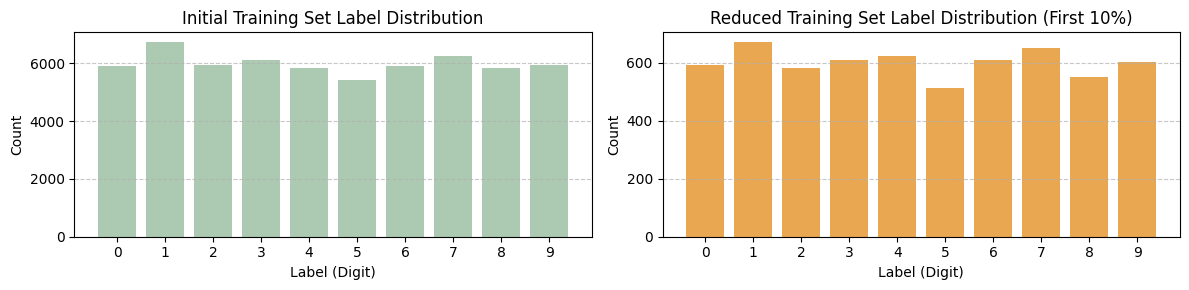

In [ ]:
# subset the first 10% of the data
def subset_first_10_percent(x, y):
    subset_size = int(len(x) * 0.1)
    return x[:subset_size], y[:subset_size]

x_train_subset, y_train_subset = subset_first_10_percent(x_train, y_train)
x_test_subset, y_test_subset = subset_first_10_percent(x_test, y_test)

# calculate the distribution of each label
initial_train_distribution = calculate_label_distribution(y_train)
reduced_train_distribution = calculate_label_distribution(y_train_subset)

# Plot
plt.figure(figsize=(12, 3))

# Initial training set distribution
plt.subplot(1, 2, 1)
plt.bar(initial_train_distribution.keys(), initial_train_distribution.values(), color='#accab2', alpha=1)
plt.title("Initial Training Set Label Distribution")
plt.xlabel("Label (Digit)")
plt.ylabel("Count")
plt.xticks(range(10))  # Ensure x-axis labels are 0-9
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Reduced training set distribution
plt.subplot(1, 2, 2)
plt.bar(reduced_train_distribution.keys(), reduced_train_distribution.values(), color='#e9a752', alpha=1)
plt.title("Reduced Training Set Label Distribution (First 10%)")
plt.xlabel("Label (Digit)")
plt.ylabel("Count")
plt.xticks(range(10))  # Ensure x-axis labels are 0-9
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plots
plt.tight_layout()
plt.show()

In [ ]:
# Print the distributions
print("Initial Training Set Label Distribution:")
for label, count in initial_train_distribution.items():
    print(f"Label {label}: {count} samples")

print("\nReduced Training Set Label Distribution (First 10%):")
for label, count in reduced_train_distribution.items():
    print(f"Label {label}: {count} samples")

Initial Training Set Label Distribution:
Label 0: 5923 samples
Label 1: 6742 samples
Label 2: 5958 samples
Label 3: 6131 samples
Label 4: 5842 samples
Label 5: 5421 samples
Label 6: 5918 samples
Label 7: 6265 samples
Label 8: 5851 samples
Label 9: 5949 samples

Reduced Training Set Label Distribution (First 10%):
Label 0: 592 samples
Label 1: 671 samples
Label 2: 581 samples
Label 3: 608 samples
Label 4: 623 samples
Label 5: 514 samples
Label 6: 608 samples
Label 7: 651 samples
Label 8: 551 samples
Label 9: 601 samples


### 2.1.3 Comparision between random selection and select the first portion
From the above results, we can see that the distribution of labels in the random selection is more similar to the label distribution in the full dataset than the selection of the first portion. In this way, random selection is more represented of the full dataset and minimizes potential bias. Selecting the first portion is acceptable if the dataset is well-shuffled, but it can introduce bias if the dataset is ordered.

### 2.1.4 Why might subsampling a dataset be beneficial when developing machine learning models

**Benefits of Subsampling**
1. Reduced Computational Cost:

- Training Time

- Memory Usage

2. Faster Iteration and Experimentation:

- Subsampling allows for quicker prototyping and experimentation with different models, hyperparameters, and preprocessing techniques.

3. Debugging and Development:

- A smaller dataset is easier to inspect, visualize, and debug.

4. Class Imbalance Mitigation:

- If the original dataset is imbalanced, subsampling can be used to create a more balanced subset, which can improve model performance for underrepresented classes.

5. Avoiding Overfitting:

- For very large datasets, subsampling can help avoid overfitting by reducing the amount of data the model is exposed to.

6. Distributed and Parallel Processing:

- Subsampling can make it easier to distribute data across multiple nodes or processes for parallel training.

**Trade-offs of Subsampling**
1. Loss of Information:

- Subsampling reduces the amount of data available for training, which can lead to a loss of important patterns or relationships in the data.

2. Reduced Model Performance:

- Models trained on smaller datasets may have lower accuracy or generalization performance because they have less data to learn from.

3. Bias in Subsampling:

- If the subsampling method introduces bias, the model may perform poorly on unseen data.

4. Difficulty with Rare Classes or Events:

- If the dataset contains rare classes or events, subsampling may further reduce their representation.

## 2.2 Feature Engineering

### 2.2.1 Features vs output
**Feature:** the pixels of each image. Each image has 784 features.

**Output:** labels, the target values that the model is trying to predict. The outputs are the digits (0-9) corresponding to each image.

Distinguishing between features (inputs) and outputs (labels) is crucial because machine learning models learn the relationship between the features and the outputs during training. The features are used as input to the model, and the outputs are used as the target values that the model tries to predict.

### 2.2.2 Explore label 3
Select all train and test images labeled "3". Plot the 2D mean and standard deviation images for category 3 in both the training and testing sets. The mean plot looks more like real handwriting while the standard deviation looks like contouring around a handwritten number. The results of the training and testing dataset look very similar.

Plot the 2D mean and standard deviation images for category "3" in the training and testing sets for the binarized images.

**Non-Binarized Images:**
- Mean Images:

  - The mean image will show the average pixel values across all images labeled "3".

  - The image will look like a blurred version of the digit "3".

- Standard Deviation Images:

  - The standard deviation image will show areas where the digit "3" varies the most (e.g., strokes, curves).

In [ ]:
# Select images labeled "3" from the training and testing sets
train_images_3 = x_train[y_train == 3]
test_images_3 = x_test[y_test == 3]

# Compute mean and standard deviation images for category "3"
def compute_mean_std_images(images):
    mean_image = np.mean(images, axis=0)
    std_image = np.std(images, axis=0)
    return mean_image, std_image

# Compute mean and standard deviation images for category "3"
train_mean_3, train_std_3 = compute_mean_std_images(train_images_3)
test_mean_3, test_std_3 = compute_mean_std_images(test_images_3)

# Binarize the images
def binarize_images(images, threshold):
    return (images >= threshold).astype(int)

train_images_3_bin = binarize_images(train_images_3, 128)
test_images_3_bin = binarize_images(test_images_3, 128)

# Compute mean and standard deviation images for binarized data
train_mean_3_bin, train_std_3_bin = compute_mean_std_images(train_images_3_bin)
test_mean_3_bin, test_std_3_bin = compute_mean_std_images(test_images_3_bin)

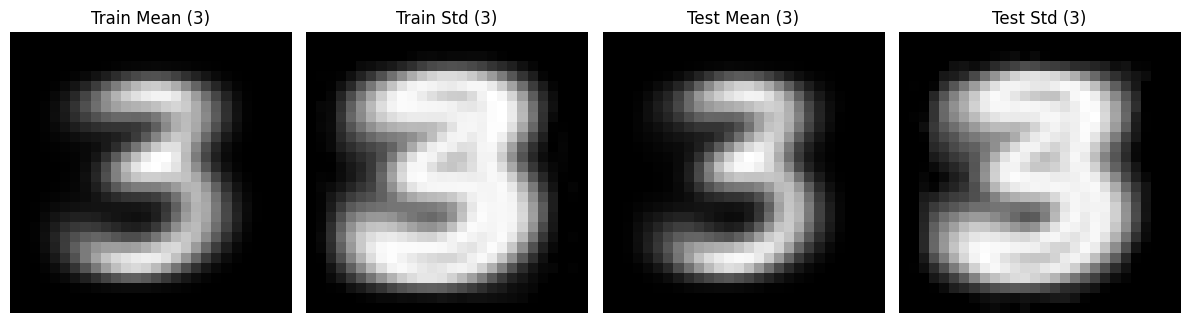

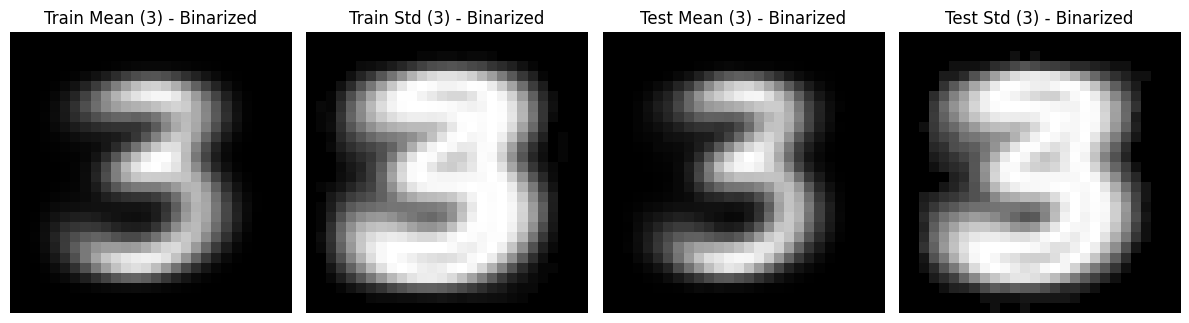

In [ ]:
def plot_images(images, titles, cmap='gray', figsize=(12, 6)):
    plt.figure(figsize=figsize)
    for i, (image, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(image, cmap=cmap)
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Plot mean and standard deviation images for original data
plot_images([train_mean_3, train_std_3, test_mean_3, test_std_3],
            titles=["Train Mean (3)", "Train Std (3)", "Test Mean (3)", "Test Std (3)"])

# Plot mean and standard deviation images for binarized data
plot_images([train_mean_3_bin, train_std_3_bin, test_mean_3_bin, test_std_3_bin],
            titles=["Train Mean (3) - Binarized", "Train Std (3) - Binarized",
                   "Test Mean (3) - Binarized", "Test Std (3) - Binarized"])

### 2.2.3 Explore label 7
Now repeat this for a new label (e.g., "7"). The results of the binarized images and non-binarized images are very similar. The difference is about the range of values. The non-binarized images is on a scale of 0 to 255 but the binarized images is from 0 to 1.

**Binarized Images:**
- Mean Images:

  - The mean image will show the probability of a pixel being 1 (active) across all images labeled "3".

  - The image will look like a sharper version of the digit "3", with pixel values ranging between 0 and 1.

- Standard Deviation Images:

  - The standard deviation image will show the variability of pixel activation (0 or 1) across all images labeled "3".

  - Areas with high standard deviation indicate where the digit "3" varies the most in terms of pixel activation.

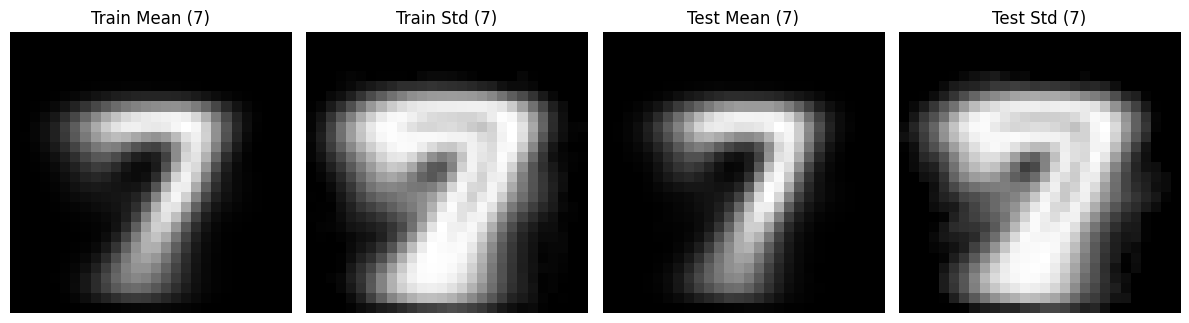

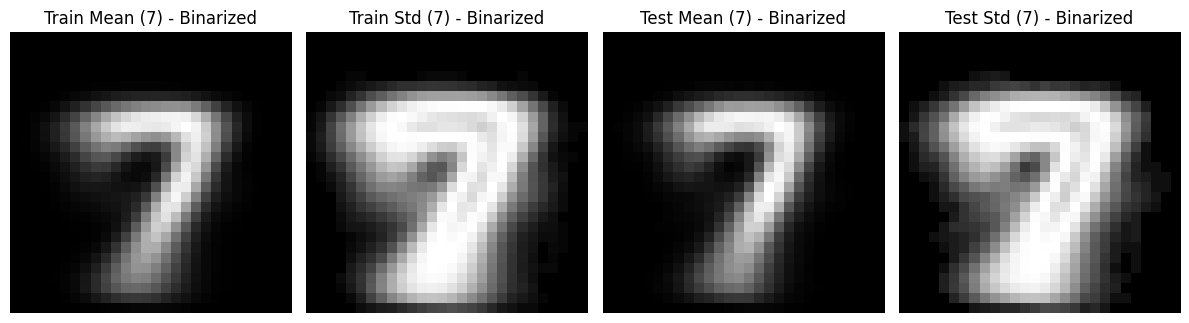

In [ ]:
# Select images labeled "7" from the training and testing sets
train_images_7 = x_train[y_train == 7]
test_images_7 = x_test[y_test == 7]

# Compute mean and standard deviation images for category "7"
train_mean_7, train_std_7 = compute_mean_std_images(train_images_7)
test_mean_7, test_std_7 = compute_mean_std_images(test_images_7)

# Binarize the images
train_images_7_bin = binarize_images(train_images_7, 128)
test_images_7_bin = binarize_images(test_images_7, 128)

# Compute mean and standard deviation images for binarized data
train_mean_7_bin, train_std_7_bin = compute_mean_std_images(train_images_7_bin)
test_mean_7_bin, test_std_7_bin = compute_mean_std_images(test_images_7_bin)

# Plot mean and standard deviation images for original data
plot_images([train_mean_7, train_std_7, test_mean_7, test_std_7],
            titles=["Train Mean (7)", "Train Std (7)", "Test Mean (7)", "Test Std (7)"])

# Plot mean and standard deviation images for binarized data
plot_images([train_mean_7_bin, train_std_7_bin, test_mean_7_bin, test_std_7_bin],
            titles=["Train Mean (7) - Binarized", "Train Std (7) - Binarized",
                   "Test Mean (7) - Binarized", "Test Std (7) - Binarized"])

### 2.2.4 Binarize by mean value
Binarize both of the images from the previous question by setting pixel values equal to 1 if they are greater than the mean value for that pixel and equal to 0 if they are less than the mean value for that pixel.

In [ ]:
train_images_3_bin.shape

(6131, 28, 28)

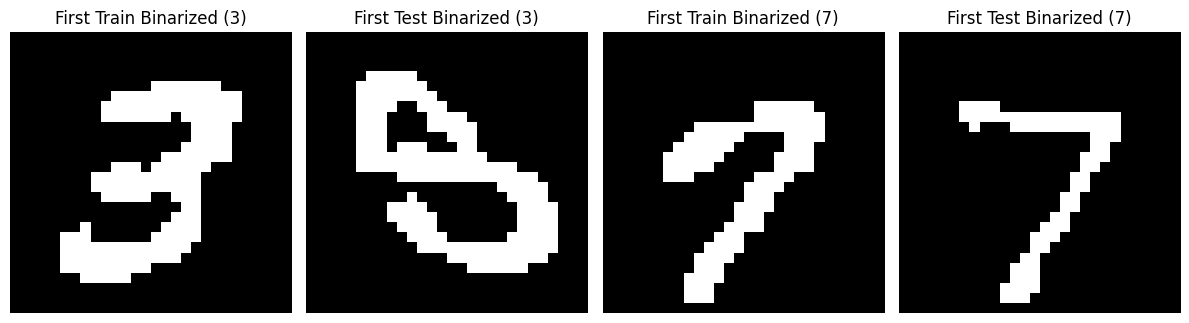

In [ ]:
# Function to binarize images based on the mean pixel value
def binarize_images_with_mean(images, mean_image):
    # Binarize images: set pixels > mean to 1, others to 0
    return (images > mean_image).astype(int)

# Binarize the images using the mean pixel value
train_images_3_bin = binarize_images_with_mean(train_images_3, train_mean_3)
test_images_3_bin = binarize_images_with_mean(test_images_3, test_mean_3)
train_images_7_bin = binarize_images_with_mean(train_images_7, train_mean_7)
test_images_7_bin = binarize_images_with_mean(test_images_7, test_mean_7)

# Plot the first binarized image in each dataset
plot_images([train_images_3_bin[0], test_images_3_bin[0], train_images_7_bin[0], test_images_7_bin[0]],
            titles=["First Train Binarized (3)", "First Test Binarized (3)", "First Train Binarized (7)", "First Test Binarized (7)"])

### 2.2.5 What does binarize an image mean
When we binarize an image, we are simplifying it by converting it from a `0` to `255` scale into a `0` & `1` version where each pixel is either fully on (represented as `1`) or fully off (represented as `0`). We threshold it based on the mean pixel value for that label or other value of our choice (e.g. 128). This process reduces the complexity of the image and makes it easier to analyze specific patterns or features.

### 2.2.6 Similar and dissimilar images
For non-binarized images in the training set, the index of the most similar image is 926 and the index of the most dissimilar image is 1729. These index changes for the binarized images. For binarized images in the training set, the index of the most similar image is 5282 and the index of the most dissimilar image is 4857.

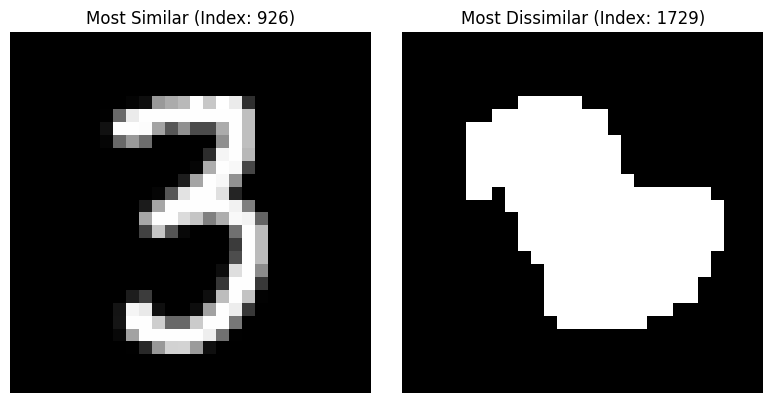

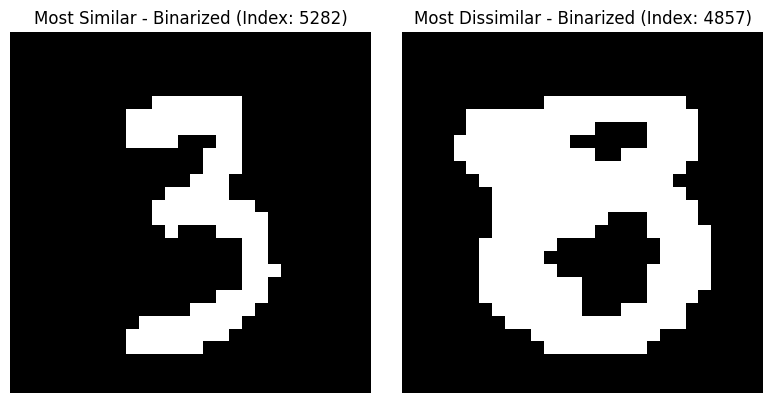

In [ ]:
def euclidean_distance(image1, image2):
    return np.sqrt(np.sum((image1 - image2) ** 2))

# Compute distances between each image and the mean image
distances = [euclidean_distance(image, train_mean_3) for image in train_images_3]

# Find the most similar and most dissimilar images
most_similar_idx = np.argmin(distances)
most_dissimilar_idx = np.argmax(distances)

# Compute distances for binarized images
distances_bin = [euclidean_distance(image, train_mean_3_bin) for image in train_images_3_bin]

# Find the most similar and most dissimilar binarized images
most_similar_idx_bin = np.argmin(distances_bin)
most_dissimilar_idx_bin = np.argmax(distances_bin)

# Plot the most similar and dissimilar images for regular data
plot_images([train_images_3[most_similar_idx], train_images_3[most_dissimilar_idx]],
            titles=[f"Most Similar (Index: {most_similar_idx})",
                    f"Most Dissimilar (Index: {most_dissimilar_idx})"], figsize=(8, 4))

# Plot the most similar and dissimilar images for binarized data
plot_images([train_images_3_bin[most_similar_idx_bin], train_images_3_bin[most_dissimilar_idx_bin]],
            titles=[f"Most Similar - Binarized (Index: {most_similar_idx_bin})",
                    f"Most Dissimilar - Binarized (Index: {most_dissimilar_idx_bin})"], figsize=(8, 4))

### 2.2.7  Effects of binarizing images
Through binarizing images, we can simplify the input and make the data easier to process by reducing the noise. Binarization shifts the focus from intensity-based features to presence/absence-based features. However, information about the intensity of pixels can be important for distinguishing subtle patterns or textures in the image.

### 2.2.8 Standardizing data
We transform raw data into a format that is more suitable for machine learning models. We clean up and simplify the data through binarizing images, which can genralize the performance of our model and make it more efficient.

### 2.2.9 Why mean and standard deviation
The mean and standard deviation can be used as a way to distinguish between number and its background and provides valuable insights into the structure and variability. They can help us find consistent features across all the images of one label and filter out the highly variable areas. A high standard deviation indicates regions where the category varies the most, which can be useful for identifying outliers, guiding preprocessing, and improving model robustness.

# 3. Model Training, Validation, and Intepretation

## 3.1 Support Vector Machine

From the training dataset, select only images from categories "3" and "9".

Subdivide the data into Set1 and Set2, with 60% of the data in Set1 and 40% in Set2. Replace category labels with 0 for 3 and 1 for 9.

Use Set1 to train a linear support vector machine classifier with default parameters and predict the class labels for Set2.

The prediction accuracy using the model trained on Set1 to predict Set2 is 0.9752. The prediction accuracy using the model trained on Set1 to predict testing dataset is 0.9762.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
# Select images labeled "3" and "9" from the training set
train_images_3 = x_train[y_train == 3]
train_images_9 = x_train[y_train == 9]
train_images = np.concatenate([train_images_3, train_images_9])

# Replace category labels: 0 for "3" and 1 for "9"
train_labels = np.concatenate([np.zeros(len(train_images_3)), np.ones(len(train_images_9))])

# Flatten the images (convert 28x28 images to 784-dimensional vectors)
train_images = train_images.reshape(train_images.shape[0], -1)

# Subdivide the data into Set1 (60%) and Set2 (40%)
Set1_images, Set2_images, Set1_labels, Set2_labels = train_test_split(
    train_images, train_labels, test_size=0.4, random_state=42
)

# Train a linear SVM classifier on Set1
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(Set1_images, Set1_labels)

# Predict labels for Set2
Set2_predictions = svm_classifier.predict(Set2_images)

# Calculate prediction accuracy on Set2
accuracy_set2 = accuracy_score(Set2_labels, Set2_predictions)
print(f"Prediction accuracy on Set2: {accuracy_set2:.4f}")

# Repeat the process using the testing set
test_images_3 = x_test[y_test == 3]
test_images_9 = x_test[y_test == 9]
test_images = np.concatenate([test_images_3, test_images_9])

# Replace category labels: 0 for "3" and 1 for "9"
test_labels = np.concatenate([np.zeros(len(test_images_3)), np.ones(len(test_images_9))])

# Flatten the test images
test_images = test_images.reshape(test_images.shape[0], -1)

# Predict labels for the testing set
test_predictions = svm_classifier.predict(test_images)

# Calculate prediction accuracy on the testing set
accuracy_test = accuracy_score(test_labels, test_predictions)
print(f"Prediction accuracy on the testing set: {accuracy_test:.4f}")

Prediction accuracy on Set2: 0.9752
Prediction accuracy on the testing set: 0.9762


## 3.2 Modeling with Engineered Data

We describe each image by using a reduced set of features (compared to n = 784 initial features for each pixel value) as follows:

- Binarize the image by setting the pixel values to 1 if they are greater than 128 and 0 otherwise.
- For each image row i, find n_i, the sum of 1's in the row (28 features).
- For each image column j, find n_j, the sum of 1's in the column (28 features).
- Concatenate these features to form a feature vector of 56 features.

The performance of SVM and KNN is very similar, and both of them perform very well. KNN's performance is slightly higher than SVM.

In [4]:
from sklearn.metrics import accuracy_score

In [ ]:
# Select images labeled "3" and "9" from the training and testing sets
train_images_3 = x_train[y_train == 3]
train_images_9 = x_train[y_train == 9]
train_images = np.concatenate([train_images_3, train_images_9])
train_labels = np.concatenate([np.zeros(len(train_images_3)), np.ones(len(train_images_9))])

test_images_3 = x_test[y_test == 3]
test_images_9 = x_test[y_test == 9]
test_images = np.concatenate([test_images_3, test_images_9])
test_labels = np.concatenate([np.zeros(len(test_images_3)), np.ones(len(test_images_9))])

# Function to binarize images and extract row/column sums
def extract_features(images):
    # Binarize images
    binarized_images = (images > 128).astype(int)

    # Compute row sums (28 features)
    row_sums = np.sum(binarized_images, axis=2)

    # Compute column sums (28 features)
    column_sums = np.sum(binarized_images, axis=1)

    # Concatenate row and column sums to form a feature vector of 56 features
    features = np.concatenate([row_sums, column_sums], axis=1)

    return features

# Extract features for training and testing sets
train_features = extract_features(train_images)
test_features = extract_features(test_images)

# Subdivide the training data into Set1 (60%) and Set2 (40%)
Set1_features, Set2_features, Set1_labels, Set2_labels = train_test_split(
    train_features, train_labels, test_size=0.4, random_state=42
)

# Train an SVM model on Set1
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(Set1_features, Set1_labels)

# Predict labels for Set2 and the testing set using SVM
Set2_predictions_svm = svm_classifier.predict(Set2_features)
test_predictions_svm = svm_classifier.predict(test_features)

# Calculate prediction accuracy for SVM
accuracy_set2_svm = accuracy_score(Set2_labels, Set2_predictions_svm)
accuracy_test_svm = accuracy_score(test_labels, test_predictions_svm)

print(f"SVM Prediction accuracy on Set2: {accuracy_set2_svm:.4f}")
print(f"SVM Prediction accuracy on the testing set: {accuracy_test_svm:.4f}")

# Train a KNN model on Set1
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(Set1_features, Set1_labels)

# Predict labels for Set2 and the testing set using KNN
Set2_predictions_knn = knn_classifier.predict(Set2_features)
test_predictions_knn = knn_classifier.predict(test_features)

# Calculate prediction accuracy for KNN
accuracy_set2_knn = accuracy_score(Set2_labels, Set2_predictions_knn)
accuracy_test_knn = accuracy_score(test_labels, test_predictions_knn)

print(f"KNN Prediction accuracy on Set2: {accuracy_set2_knn:.4f}")
print(f"KNN Prediction accuracy on the testing set: {accuracy_test_knn:.4f}")

SVM Prediction accuracy on Set2: 0.9638
SVM Prediction accuracy on the testing set: 0.9638
KNN Prediction accuracy on Set2: 0.9685
KNN Prediction accuracy on the testing set: 0.9658


## 3.3 K-Nearest Neighbors

In the training and testing datasets, select images in the categories 1, 3, 5, 7, and 9. Train a k-NN classifier using 4 to 40 nearest neighbors, with a step size of 4.

For k = 4, label 9 was predicted with lowest accuracy.

For k = 20, label 7 was predicted with lowest accuracy.

label 7 and label 1 were confused most often.

Visualize 5 mislabeled samples with their actual and predicted labels.

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

For k=4, the label predicted with the lowest accuracy is: 9
For k=20, the label predicted with the lowest accuracy is: 7
The label pair confused most often is: (7, 1)


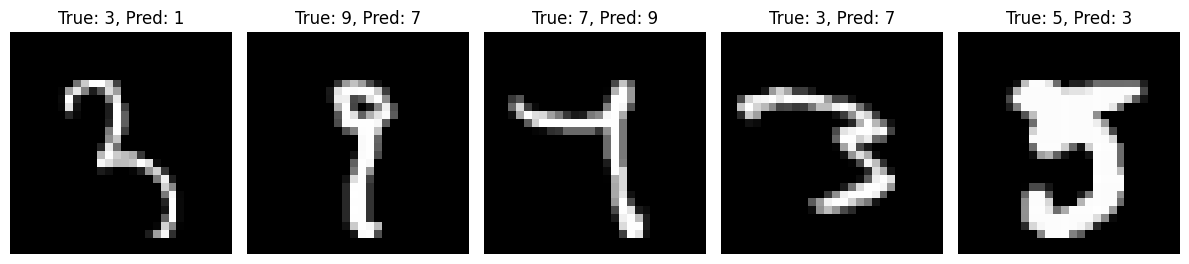

In [7]:
# Select images labeled 1, 3, 5, 7, and 9
selected_labels = [1, 3, 5, 7, 9]
train_mask = np.isin(y_train, selected_labels)
test_mask = np.isin(y_test, selected_labels)

x_train_selected = x_train[train_mask]
y_train_selected = y_train[train_mask]
x_test_selected = x_test[test_mask]
y_test_selected = y_test[test_mask]

# Flatten the images (convert 28x28 images to 784-dimensional vectors)
x_train_selected = x_train_selected.reshape(x_train_selected.shape[0], -1)
x_test_selected = x_test_selected.reshape(x_test_selected.shape[0], -1)

# Train a k-NN classifier for k = 4 to 40, step size of 4
k_values = range(4, 41, 4)
results = {}

for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(x_train_selected, y_train_selected)

    # Predict labels for the testing set
    y_pred = knn_classifier.predict(x_test_selected)

    # Calculate accuracy
    accuracy = accuracy_score(y_test_selected, y_pred)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test_selected, y_pred, labels=selected_labels)

    # Store results
    results[k] = {
        'accuracy': accuracy,
        'confusion_matrix': cm
    }

# For k = 4, find the label predicted with the lowest accuracy
k4_cm = results[4]['confusion_matrix']
k4_accuracy_per_label = k4_cm.diagonal() / k4_cm.sum(axis=1)
k4_worst_label = selected_labels[np.argmin(k4_accuracy_per_label)]
print(f"For k=4, the label predicted with the lowest accuracy is: {k4_worst_label}")

# For k = 20, find the label predicted with the lowest accuracy
k20_cm = results[20]['confusion_matrix']
k20_accuracy_per_label = k20_cm.diagonal() / k20_cm.sum(axis=1)
k20_worst_label = selected_labels[np.argmin(k20_accuracy_per_label)]
print(f"For k=20, the label predicted with the lowest accuracy is: {k20_worst_label}")

# Find the label pair that was confused most often
# Sum confusion matrices across all k values
total_cm = sum([results[k]['confusion_matrix'] for k in k_values])
np.fill_diagonal(total_cm, 0)  # Ignore correct predictions
most_confused_pair = np.unravel_index(np.argmax(total_cm), total_cm.shape)
most_confused_labels = (selected_labels[most_confused_pair[0]], selected_labels[most_confused_pair[1]])
print(f"The label pair confused most often is: {most_confused_labels}")

# Visualize 5 mislabeled samples
knn_classifier = KNeighborsClassifier(n_neighbors=4)
knn_classifier.fit(x_train_selected, y_train_selected)
y_pred = knn_classifier.predict(x_test_selected)

mislabeled_indices = np.where(y_pred != y_test_selected)[0][:5]  # First 5 mislabeled samples

plt.figure(figsize=(12, 6))
for i, idx in enumerate(mislabeled_indices):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test_selected[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test_selected[idx]}, Pred: {y_pred[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

Based on the patterns in the pixel values for each category, the model might struggle to identify or distinguish labels 7 and 9 from one another. The reason for label 7 to become hard to identify may be because of the writing style of it. Some people may prefer adding a dot on 7 while other people just write 7 as it is. When adding a dot, the pattern of 7 starts to become very similar to 9, especially if the hand writing is very sketchy.

## 3.4 Comprehension Questions

It important to have separate training and testing datasets in order to get a more generalized model. It provides a more realistic measure of its ability to generalize to new, unseen examples. If we use the same data for both training and evaluation, overfitting will occur and make the model perform very good when testing but very bad when applying to other data.

If we achieve high accuracy on the training set but lower accuracy on the testing set, this is a classic sign of overfitting. Overfitting occurs when a model learns the noise, outliers, or specific patterns in the training data